In [1]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Read data, clean up names

beans = pd.read_csv('Dry_Bean_Dataset.csv')
beans['Class'] = beans['Class'].str.capitalize()
print(beans.shape)
beans.describe()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
# Train model and make predictions for the test set.
beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))
y_pred = beanKnnClassifier.predict(scaler.transform(X_test))

In [6]:
# Predict one bean
bean = pd.DataFrame(data={'MajorAxisLength': [400], 'MinorAxisLength': [200]})
beanKnnClassifier.predict(scaler.transform(bean))

array(['Horoz'], dtype=object)

In [7]:
# Compute metrics
print(metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_pred, y_test))

0.864103819784525
[[279   0  67   0   5   7  12]
 [  0 166   0   0   0   0   0]
 [ 97   0 397   0  12   0   2]
 [  0   0   0 990   8  21 108]
 [  0   0  10   2 529   0  22]
 [  8   0   0  21   0 547  24]
 [ 17   0   1  70  19  22 621]]


# Visualizing the regions of classification

In [8]:
# Take a sample to keep runtime low while seeing what areas are classified as each bean
beanSample = beans.sample(200, random_state=123)
beanSample.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54127.990000,865.381605,324.575264,202.770531,1.599216,0.758134,54884.245000,255.138392,0.749011,0.986699,0.868323,0.795476,0.006565,0.001682,0.636377,0.994809
std,30512.573123,225.933495,89.417657,46.635806,0.245734,0.085995,30943.202531,61.979882,0.049709,0.005112,0.062621,0.060103,0.001155,0.000596,0.095587,0.004285
min,22726.000000,550.994000,203.892624,142.389986,1.105963,0.427131,23071.000000,170.104797,0.588422,0.956634,0.670689,0.664848,0.003293,0.000700,0.442023,0.969040
25%,36224.750000,704.808250,256.953182,173.406526,1.431583,0.715583,36561.750000,214.761800,0.713677,0.985245,0.819555,0.759451,0.005897,0.001120,0.576766,0.993542
50%,45035.500000,798.344000,298.759333,191.330168,1.570727,0.771155,45534.500000,239.459747,0.758957,0.988034,0.879373,0.796584,0.006696,0.001651,0.634546,0.996236
75%,63414.750000,981.381000,383.678223,216.577589,1.722959,0.814333,64208.000000,284.151661,0.786572,0.989729,0.917764,0.834575,0.007363,0.002170,0.696515,0.997552
max,191042.000000,1693.703000,648.057449,389.461020,2.241201,0.894939,193440.000000,493.195934,0.840000,0.993906,0.986812,0.949719,0.008972,0.003127,0.901966,0.999674


In [9]:
# Create integer-valued labels for plot_decision_regions()
beanSample['Int'] = beanSample['Class'].replace(
    to_replace = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
    value = [int(0), int(1), int(2), int(3), int(4), int(5), int(6)])

# Define input and output features
X = beanSample[['MajorAxisLength', 'MinorAxisLength']]
y = beanSample[['Int']]

# Fit model
beanKnnClassifier.fit(X, np.ravel(y))

KNeighborsClassifier()

/nix/store/1ik1d6nmivm65lnf9pzvjzfbh04754q4-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/nix/store/1ik1d6nmivm65lnf9pzvjzfbh04754q4-python3-3.10.9-env/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


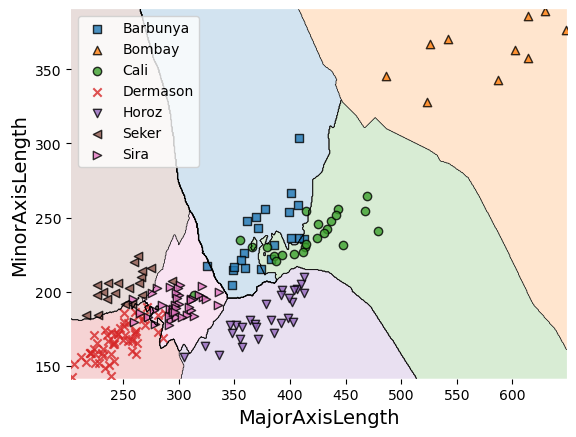

In [10]:
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=beanKnnClassifier, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_xlabel('MajorAxisLength', fontsize=14)
p.set_ylabel('MinorAxisLength', fontsize=14)

# Add legend 
L = plt.legend()

L.get_texts()[0].set_text('Barbunya')
L.get_texts()[1].set_text('Bombay')
L.get_texts()[2].set_text('Cali')
L.get_texts()[3].set_text('Dermason')
L.get_texts()[4].set_text('Horoz')
L.get_texts()[5].set_text('Seker')
L.get_texts()[6].set_text('Sira')